Optimized the step
Optimized the step
Optimized the step
1.0


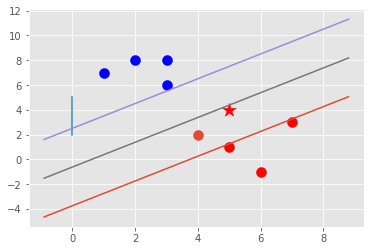

In [29]:
import matplotlib
import numpy as np;
from matplotlib import style
import matplotlib.pyplot as plt;

style.use('ggplot')

class support_vm:
    def __init__(self,visualization = True):
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if(self.visualization):
            self.ax= plt

    def fit(self,data):
        self.data = data
        all_data = []
        opt_dict ={}
        transform =((1,1),(1,-1),(-1,1),(-1,-1))
        for yi in self.data:
            for features in self.data[yi]:
                for feature in features:
                    all_data.append(feature)
        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None
        step_sizes = [self.max_feature_value*0.1,self.max_feature_value*0.01,self.max_feature_value*0.005]
        b_range_multiple = 5
        b_multiple =5
        latest_optimum = self.max_feature_value * 10
        for step in step_sizes:
            w= np.array([latest_optimum,latest_optimum])
            optimized  = False
            while not optimized:
                for b in np.arange(-1*self.max_feature_value*b_range_multiple,self.max_feature_value*b_range_multiple,step*b_multiple):
                    for transformation in transform:
                        w_t = w * transformation
                        found_option = True
                        for i in  self.data:
                            for xi in self.data[i]:
                                yi = i
                                if not yi*(np.dot(w_t,xi)+b)>= 1:
                                    found_option = False
                                
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]

                if w[0]<0:
                    optimized = True
                    print('Optimized the step')
                else:
                    w = w - step

            if(len(opt_dict)>0):
                norms = sorted([n for n in opt_dict])
                opt_choice = opt_dict[norms[0]]
                self.w = opt_choice[0]
                self.b = opt_choice[1]
                latest_optimum = opt_choice[0][0] + step * 2
           
                       
    def predict(self,params):
        classification = np.sign(np.dot(np.array(params),self.w)+self.b)
        if classification != 0 and self.visualization:
            self.ax.scatter(params[0],params[1],s=200,marker='*',c=self.colors[classification])
        return classification

    def visualize(self):
        [[self.ax.scatter(x=x[0],y=x[1],s=100,c=self.colors[i]) for x in data_dict[i]] for i in data_dict]
        self.ax.scatter(x=4,y=2,s=100)
        def hyperplane(x,w,b,v):
            return (-w[0]*x -b+v)/w[1]

        datarange = (self.min_feature_value*0.9,self.max_feature_value *1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]

        psv1 = hyperplane(hyp_x_min,self.w,self.b,1)
        psv2 = hyperplane(hyp_x_max,self.w,self.b,1)
        self.ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2])


        nsv1 = hyperplane(hyp_x_min,self.w,self.b,-1)
        nsv2 = hyperplane(hyp_x_max,self.w,self.b,-1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2])

        db1 = hyperplane(hyp_x_min,self.w,self.b,0)
        db2 = hyperplane(hyp_x_max,self.w,self.b,0)
        self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2])

data_dict = {
    -1:np.array([[1,7],[2,8],[3,6],[3,8]]),
    1:np.array([[5,1],[6,-1],[7,3]])
}

svm = support_vm()
svm.fit(data_dict)
svm.visualize()
print(svm.predict([5,4]))

